<a href="https://colab.research.google.com/github/nikos258/uni-4-AI/blob/main/MNIST_Tensorflow_filled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [82]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [83]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [84]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [85]:
rows = 5
digits_per_row = 5

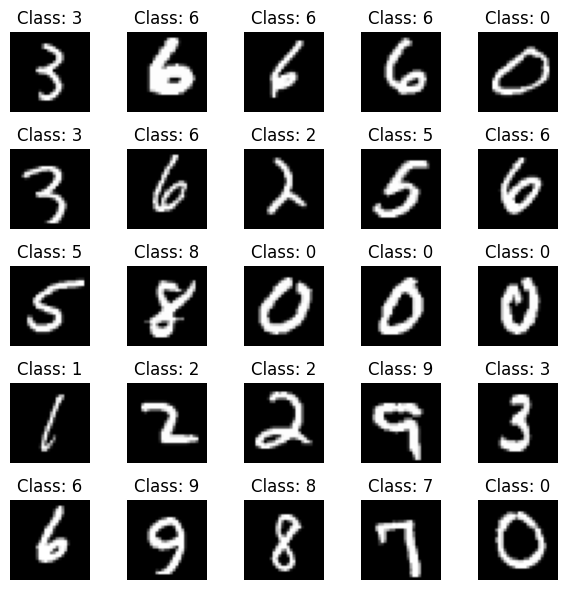

In [86]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [87]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [88]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.003
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 15

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 512)               401920    
                                                                 
 hidden-2 (Dense)            (None, 256)               131328    
                                                                 
 hidden-3 (Dense)            (None, 128)               32896     
                                                                 
 outputs (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 1.8408 - accuracy: 0.8781 - val_loss: 0.2288 - val_accuracy: 0.9312
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1800 - accuracy: 0.9463 - val_loss: 0.1902 - val_accuracy: 0.9431
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1288 - accuracy: 0.9612 - val_loss: 0.1524 - val_accuracy: 0.9557
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1003 - accuracy: 0.9693 - val_loss: 0.1427 - val_accuracy: 0.9591
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0801 - accuracy: 0.9752 - val_loss: 0.1457 - val_accuracy: 0.9601
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.1336 - val_accuracy: 0.9632
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.1303 - val_ac

# Display Loss and Accuracy per Training Epoch

In [91]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

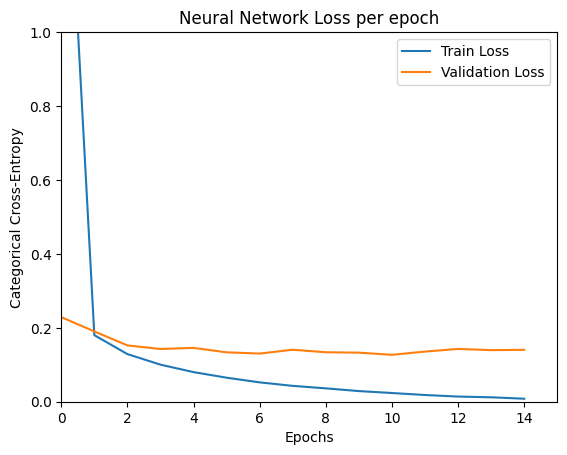

In [92]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

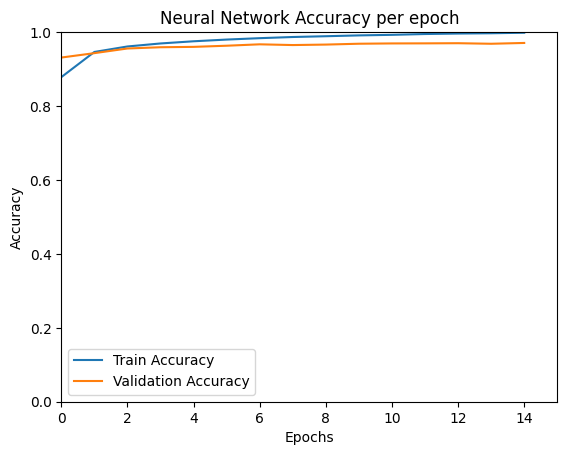

In [93]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


The full table is in the word document.

The final hyperparameter values are:
* layers: 5
* neurons per layer: 784-512-256-128-10
* learning rate: 0.003
* number of epochs: 15
* activation function: relu
* accuracy (training): 0.9993
* accuracy (validation): 0.9725

## 2. Validation: Show 1 misclassified digit from each class.

313/313 [==============================] - 1s 3ms/step


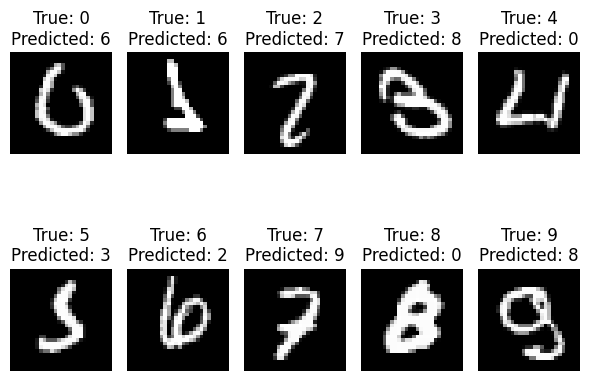

In [94]:
# the model predicts the output for the test images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test.numpy(), axis=1)

misclassified_indices = np.where(predicted_classes != true_classes)[0]
# make a dictionary with
misclassified_samples = {i: None for i in range(10)}

for idx in misclassified_indices:
    true_class = true_classes[idx]
    predicted_class = predicted_classes[idx]
    if misclassified_samples[true_class] is None:
        misclassified_samples[true_class] = (x_test[idx].reshape(28, 28), true_class, predicted_class)

    if not None in misclassified_samples.values():
        break

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(6, 5))
axes = axes.flatten()

for i, (ax, key) in enumerate(zip(axes, misclassified_samples.keys())):
    sample = misclassified_samples[key]
    if sample is not None:
        ax.imshow(sample[0], cmap='gray')
        ax.set_title(f'True: {sample[1]}\nPredicted: {sample[2]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Apart from hyperparameter tuning we can change the architecture of the neural network. For this instance we have chosen a CNN (convolutional neural network). For it to work the mnist dataset is redownloaded so that the images are in the form of (28, 28) structures. The final accuraccy looks better than that of the previous attempts.

In [95]:
# redownload the data so that the images are shaped in the original 28X28
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()

# reshape the data and one-hot-encode the targets
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [96]:
activation = 'relu'
epochs = 10

# make the convolutional neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=activation),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary(expand_nested=True)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_38 (Dense)            (None, 128)             

In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1184 - accuracy: 0.9636 - val_loss: 0.0487 - val_accuracy: 0.9846
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0494 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0396 -

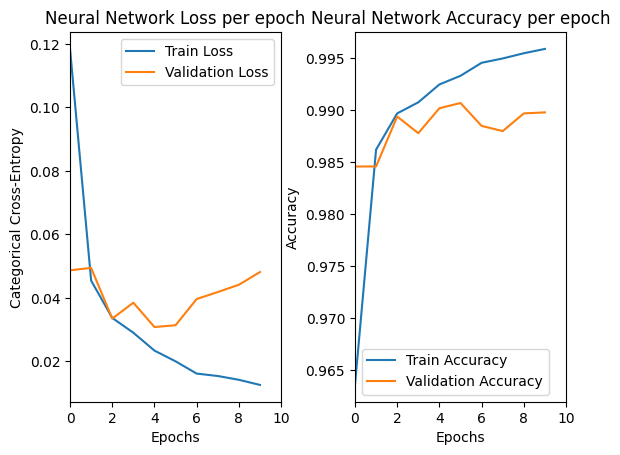

<Figure size 1500x600 with 0 Axes>

In [98]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(15,6))
fig.subplots_adjust(wspace=0.35)

ax[0].plot(train_loss, label='Train Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Neural Network Loss per epoch')
ax[0].set_ylabel('Categorical Cross-Entropy')
ax[0].set_xlabel('Epochs')
ax[0].set_xlim(0, epochs)
# ax[0].set_ylim(0, 1)
ax[0].legend()

ax[1].plot(train_acc, label='Train Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Neural Network Accuracy per epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_xlim(0, epochs)
# ax[1].set_ylim(0, 1)
ax[1].legend()
plt.show()

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [99]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [100]:
!pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib